<a href="https://colab.research.google.com/github/zhoujiuzhou9/tensorFlow/blob/V1/tensor09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import os
import tensorflow as tf
import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print(tf.__version__)

x = tf.constant([[2, 2], [3, 3]])
y = tf.constant([[8, 16], [2, 3]])
print(x @ y)

a = tf.ones([4, 2, 3])
b = tf.ones([4, 3, 5])
c = a @ b
print(c.shape)


2.8.2
tf.Tensor(
[[20 38]
 [30 57]], shape=(2, 2), dtype=int32)
(4, 2, 5)


Recap
▪ 𝑜𝑢𝑡 = 𝑟𝑒𝑙𝑢{𝑟𝑒𝑙𝑢 𝑟𝑒𝑙𝑢 𝑋@𝑊1 + 𝑏1 @𝑊2 + 𝑏2 @𝑊3 + 𝑏3}

▪ 𝑝𝑟𝑒𝑑 = 𝑎𝑟𝑔𝑚𝑎𝑥(𝑜𝑢𝑡)

▪ 𝑙𝑜𝑠𝑠 = 𝑀𝑆𝐸(𝑜𝑢𝑡, 𝑙𝑎𝑏𝑒𝑙)

▪ minimize 𝑙𝑜𝑠𝑠

▪ [𝑊1

′
, 𝑏1
′
, 𝑊2
′
, 𝑏2
′
, 𝑊3
′
, 𝑏3
′


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# x: [60k, 28, 28],
# y: [60k]
(x, y), _ = datasets.mnist.load_data()
# x: [0~255] => [0~1.]
x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
y = tf.convert_to_tensor(y, dtype=tf.int32)

print(x.shape, y.shape, x.dtype, y.dtype)
print(tf.reduce_min(x), tf.reduce_max(x))
print(tf.reduce_min(y), tf.reduce_max(y))

train_db = tf.data.Dataset.from_tensor_slices((x, y)).batch(128)
train_iter = iter(train_db)
sample = next(train_iter)
print('batch:', sample[0].shape, sample[1].shape)

# [b, 784] => [b, 256] => [b, 128] => [b, 10]
# [dim_in, dim_out], [dim_out]
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))

lr = 1e-3

for epoch in range(10):  # iterate db for 10
    for step, (x, y) in enumerate(train_db):  # for every batch
        # x:[128, 28, 28]
        # y: [128]

        # [b, 28, 28] => [b, 28*28]
        x = tf.reshape(x, [-1, 28 * 28])

        with tf.GradientTape() as tape:  # tf.Variable
            # x: [b, 28*28]
            # h1 = x@w1 + b1
            # [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b, 256] + [b, 256]
            h1 = x @ w1 + tf.broadcast_to(b1, [x.shape[0], 256])
            h1 = tf.nn.relu(h1)
            # [b, 256] => [b, 128]
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # [b, 128] => [b, 10]
            out = h2 @ w3 + b3

            # compute loss
            # out: [b, 10]
            # y: [b] => [b, 10]
            y_onehot = tf.one_hot(y, depth=10)

            # mse = mean(sum(y-out)^2)
            # [b, 10]
            loss = tf.square(y_onehot - out)
            # mean: scalar
            loss = tf.reduce_mean(loss)

        # compute gradients
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        # print(grads)
        # w1 = w1 - lr * w1_grad
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])

        if step % 100 == 0:
            print(epoch, step, 'loss:', float(loss))


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) <dtype: 'float32'> <dtype: 'int32'>
tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(9, shape=(), dtype=int32)
batch: (128, 28, 28) (128,)
0 0 loss: 0.5511699914932251
0 100 loss: 0.21255192160606384
0 200 loss: 0.1738269180059433
0 300 loss: 0.15766045451164246
0 400 loss: 0.16910482943058014
1 0 loss: 0.14802569150924683
1 100 loss: 0.14464299380779266
1 200 loss: 0.13876572251319885
1 300 loss: 0.13339461386203766
1 400 loss: 0.14206723868846893
2 0 loss: 0.12693972885608673
2 100 loss: 0.1271876096725464
2 200 loss: 0.12184516340494156
2 300 loss: 0.11903808265924454
2 400 loss: 0.12596118450164795
3 0 loss: 0.11372270435094833
3 100 loss: 0.11545100063085556
3 200 loss: 0.11040804535150528
3 300 loss: 0.10914850234985352
3 400 loss: 0.11500175297260284
4 0 loss: 0.10449453443288803
4 100 loss: 0.10693683475255966
4 2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
x = tf.constant([1, 4])
y = tf.constant([2, 5])
z = tf.constant([3, 6])
tf.stack([x, y, z])

tf.stack([x, y, z], axis=1)



<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
a=tf.ones([3,3])
b=tf.norm(a)

print(b.numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=3.0>>


In [ ]:
import tensorflow as tf
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.random.set_seed(2467)


def accuracy(output, target, topk=(1,)):
    maxk = max(topk)
    batch_size = target.shape[0]

    pred = tf.math.top_k(output, maxk).indices
    pred = tf.transpose(pred, perm=[1, 0])
    target_ = tf.broadcast_to(target, pred.shape)
    # [10, b]
    correct = tf.equal(pred, target_)

    res = []
    for k in topk:
        correct_k = tf.cast(tf.reshape(correct[:k], [-1]), dtype=tf.float32)
        correct_k = tf.reduce_sum(correct_k)
        acc = float(correct_k * (100.0 / batch_size))
        res.append(acc)

    return res


output = tf.random.normal([10, 6])
output = tf.math.softmax(output, axis=1)
target = tf.random.uniform([10], maxval=6, dtype=tf.int32)
print('prob:', output.numpy())
pred = tf.argmax(output, axis=1)
print('pred:', pred.numpy())
print('label:', target.numpy())

acc = accuracy(output, target, topk=(1, 2, 3, 4, 5, 6))
print('top-1-6 acc:', acc)


prob: [[0.25310278 0.21715644 0.16043882 0.13088997 0.04334084 0.19507109]
 [0.05892418 0.04548917 0.00926314 0.14529602 0.66777605 0.07325139]
 [0.09742809 0.08304427 0.07460099 0.04067177 0.626185   0.07806987]
 [0.20478569 0.12294925 0.12010485 0.13751233 0.36418733 0.05046057]
 [0.11872064 0.31072393 0.12530337 0.15528883 0.21325873 0.07670453]
 [0.01519807 0.09672114 0.1460476  0.00934331 0.5649092  0.1677807 ]
 [0.04199061 0.18141054 0.06647632 0.6006175  0.03198383 0.07752118]
 [0.09226219 0.23460893 0.13022321 0.16295876 0.05362028 0.32632664]
 [0.07019574 0.08611772 0.10912607 0.10521299 0.2152082  0.4141393 ]
 [0.01882887 0.2659769  0.19122466 0.2410926  0.14920163 0.1336753 ]]
pred: [0 4 4 4 1 4 3 5 5 1]
label: [0 2 3 4 2 4 2 3 5 5]
top-1-6 acc: [40.0, 40.0, 50.0, 70.0, 80.0, 100.0]


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, optimizers
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print(tf.__version__)

(x, y), _ = datasets.mnist.load_data()
x = tf.convert_to_tensor(x, dtype=tf.float32) / 50.
y = tf.convert_to_tensor(y)
y = tf.one_hot(y, depth=10)
print('x:', x.shape, 'y:', y.shape)
train_db = tf.data.Dataset.from_tensor_slices((x, y)).batch(128).repeat(30)
x, y = next(iter(train_db))
print('sample:', x.shape, y.shape)


# print(x[0], y[0])


def main():
    # 784 => 512
    w1, b1 = tf.Variable(tf.random.truncated_normal([784, 512], stddev=0.1)), tf.Variable(tf.zeros([512]))
    # 512 => 256
    w2, b2 = tf.Variable(tf.random.truncated_normal([512, 256], stddev=0.1)), tf.Variable(tf.zeros([256]))
    # 256 => 10
    w3, b3 = tf.Variable(tf.random.truncated_normal([256, 10], stddev=0.1)), tf.Variable(tf.zeros([10]))

    optimizer = optimizers.SGD(lr=0.01)

    for step, (x, y) in enumerate(train_db):

        # [b, 28, 28] => [b, 784]
        x = tf.reshape(x, (-1, 784))

        with tf.GradientTape() as tape:

            # layer1.
            h1 = x @ w1 + b1
            h1 = tf.nn.relu(h1)
            # layer2
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # output
            out = h2 @ w3 + b3
            # out = tf.nn.relu(out)

            # compute loss
            # [b, 10] - [b, 10]
            loss = tf.square(y - out)
            # [b, 10] => [b]
            loss = tf.reduce_mean(loss, axis=1)
            # [b] => scalar
            loss = tf.reduce_mean(loss)

        # compute gradient
        grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
        # print('==before==')
        # for g in grads:
        #     print(tf.norm(g))

        grads, _ = tf.clip_by_global_norm(grads, 15)

        # print('==after==')
        # for g in grads:
        #     print(tf.norm(g))
        # update w' = w - lr*grad
        optimizer.apply_gradients(zip(grads, [w1, b1, w2, b2, w3, b3]))

        if step % 100 == 0:
            print(step, 'loss:', float(loss))


if __name__ == '__main__':
    main()


2.8.2
11501568/11490434 [==============================] - 0s 0us/step
x: (60000, 28, 28) y: (60000, 10)
sample: (128, 28, 28) (128, 10)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


0 loss: 17.707599639892578
100 loss: 0.5134084820747375
200 loss: 0.16467225551605225
300 loss: 0.11890697479248047
400 loss: 0.09359651803970337
500 loss: 0.08339296281337738
600 loss: 0.0911116674542427
700 loss: 0.0723511353135109
800 loss: 0.07976216077804565
900 loss: 0.06177585572004318
1000 loss: 0.06797155737876892
1100 loss: 0.06429316848516464
1200 loss: 0.06276744604110718
1300 loss: 0.06567469984292984
1400 loss: 0.045643482357263565
1500 loss: 0.053237657994031906
1600 loss: 0.060986828058958054
1700 loss: 0.06651026755571365
1800 loss: 0.06772265583276749
1900 loss: 0.049538783729076385
2000 loss: 0.052303433418273926
2100 loss: 0.045730143785476685
2200 loss: 0.05582738667726517
2300 loss: 0.05114409327507019
2400 loss: 0.046876005828380585
2500 loss: 0.049662940204143524
2600 loss: 0.05392695218324661
2700 loss: 0.05266182869672775
2800 loss: 0.04031388834118843
2900 loss: 0.0391383059322834
3000 loss: 0.04520463943481445
3100 loss: 0.035489216446876526
3200 loss: 0.055

points: (500, 500, 2)
z: (500, 500)


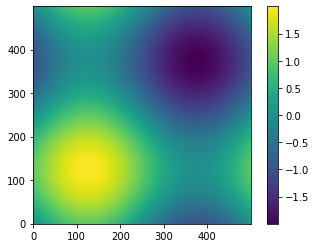

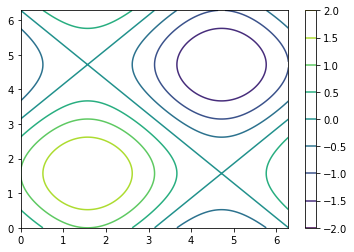

In [2]:
import tensorflow as tf

import matplotlib.pyplot as plt


def func(x):
    """

    :param x: [b, 2]
    :return:
    """
    z = tf.math.sin(x[...,0]) + tf.math.sin(x[...,1])

    return z


x = tf.linspace(0., 2*3.14, 500)
y = tf.linspace(0., 2*3.14, 500)
# [50, 50]
point_x, point_y = tf.meshgrid(x, y)
# [50, 50, 2]
points = tf.stack([point_x, point_y], axis=2)
# points = tf.reshape(points, [-1, 2])
print('points:', points.shape)
z = func(points)
print('z:', z.shape)

plt.figure('plot 2d func value')
plt.imshow(z, origin='lower', interpolation='none')
plt.colorbar()

plt.figure('plot 2d func contour')
plt.contour(point_x, point_y, z)
plt.colorbar()
plt.show()